# Topas Work - Team protons and heavy ions
### PHY-7051 Physique des radiations en radiothérapie et en radiologie
Gabrielle Germain (111 266 117), Hanieh Sadat Jozi (111 XXX XXX), Philippe Dionne (111 265 307)

In [9]:
import numpy as np
import matplotlib.pyplot as plt

Useful functions

In [10]:
def csv_to_data(path:str, skiprows:int=9, delimiter:str=',') -> tuple:
    """ Reads the csv file and converts it to a tuple containing 3 columns matrices

    Args:
        path (str): absolute path on the computer. Must have the format r"C:\path.csv"
        skiprows (int, optional): Rows to skip the header. Defaults to 9.
        delimiter (str, optional): Defaults to ', '.

    Returns:
        tuple: (bin, dose, standard-deviation)
    """

    data = np.loadtxt(path, skiprows=skiprows, delimiter=delimiter, usecols=(2, 3, 4))
    bin = data[:, 0]
    dose = data[:, 1]
    std = data[:, 2]
    return (bin, dose, std)

Constants

In [11]:
MeV_to_joule = 1.602176565e-13 # J/MeV

## Depth of the Bragg Peak for a carbon ions beam

Un des arguments en faveur de l'utilisation de faisceau de proton ou d'ions lourds comme le carbone est que la majorité de la dose du faisceau peut être déposé de manière précise (précision sub-millimétrique) à l'endroit de son pic de Bragg. Cependant, comme il sera démontré ci-dessous, l'endroit où le pic de Bragg se trouve dépend de la _mean excitation energy_ du milieu qu'il traverse.

Tout d'abord, des simulations pour un faisceau d'ions de carbone à une énergie de 430 MeV/u ont été réalisé en définissant trois milieux d'eau avec des _mean excitation energy_ différents; soit de 67, 75 et 80 eV.

Ion de carbone de  67 eV - Erreur relative suffisante atteinte!
0.0517 % < 3 %
Ion de carbone de  75 eV - Erreur relative suffisante atteinte!
0.0511 % < 3 %
Ion de carbone de  80 eV - Erreur relative suffisante atteinte!
0.0523 % < 3 %


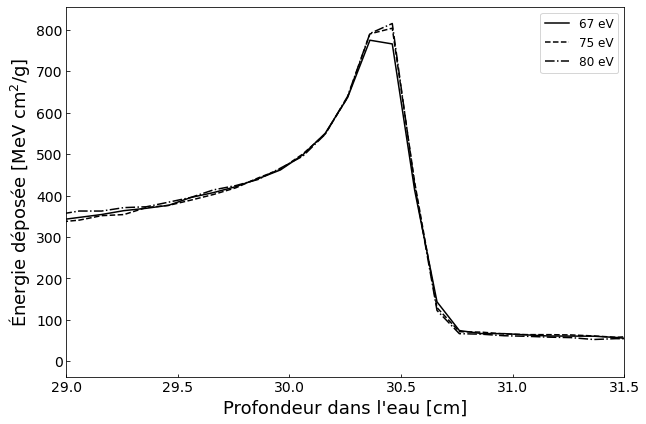

In [12]:
""" Le code ci-bas génère la figure 6.13 du manuel de référence, soit le dépôt de la dose à différentes profondeurs dans un fantôme d'eau avec des valeurs de I_w différentes (67, 75 et 80eV)."""

# ------------------------------- Paramètres ------------------------------------------- #
""" Initialisation des paramètres utilisés dans les codes de simulation TOPAS. """

field_size = 100 # cm2
i_values = np.array([67, 75, 80])      # eV
energies_c = np.array([430, 430, 430])      # MeV/u, u = 12
nbr_c = np.array([10000, 10000, 10000]) # nbr d'ions de carbone simulés pour chaque énergie
tot_depths = np.array([50, 50]) # profondeur des scorers pour chaque particule, en cm
in_fluence_c = nbr_c/field_size # cm-2

np.seterr(divide='ignore', invalid='ignore')

""" initialisation des données """
std_rel_c = np.empty(np.size(energies_c))

""" initialisation de la figure """

fig1 = plt.figure(figsize=(10, 15))
ax1 = plt.subplot(2, 1, 2)      # carbone
plt.xlabel("Profondeur dans l'eau [cm]", fontsize='18')
plt.ylabel("Énergie déposée [MeV cm$^2$/g]", fontsize='18')
plt.tick_params(direction='in',labelsize='14')

marker = ['-','--','-.']


for i in range(len(energies_c)):
    i_value = i_values[i]
    path = r"/Users/pdionne/Université/Maîtrise/A23/Phys des radiations/Devoir/Proton - A23/Carbon_430MeV_I_{}eV.csv".format(i_value)
    bins, dose, std = csv_to_data(path)

    # erreur relative
    std_rel_c[i] = (np.nanmean(std/dose))*100 # % erreur moyenne sur mesure de dose
    if std_rel_c[i] < 3: # erreur maximale est choisie à 3%
        print("Ion de carbone de ", i_value, "eV - Erreur relative suffisante atteinte!")
        print(format(std_rel_c[i], '.3g'), "% <", "3 %")
    else:
        print("Ion de carbone ", i_value, "eV - Erreur relative trop élevée")
        print(format(std_rel_c[i], '.3g'), "% >", "3 %")

    # conversion dose et profondeur
    depth = bins * tot_depths[1]/len(bins)
    dose = dose/(10000*MeV_to_joule*in_fluence_c[i]) # MeV cm2/g, conversion des MeV en Joule et normalisation par la fluence initiale


    # Figure
    ax1.plot(depth, dose, marker[i], label="{} eV".format(i_value), color="k")


ax1.set_xlim([29, 31.5])
ax1.legend(loc=0, frameon=True, fontsize='12')


Pour une raison inconnu, TOPAS ou Geant4 ne semble pas tenir compte des différentes valeurs de _mean excitation value_ pour l'eau "custom" qui est donnée dans les différents fichiers de paramètres. En regardant sur la documentation en ligne, Geant4 défini le matériel _G4-WATER_ avec un _mean excitation value_ de 78eV. Il existe également un matériel prédéfini _Water-75eV_ avec un _mean excitation value_ de 75eV. La figure démontrant la position du pic de Bragg pour les deux matériaux différents est illustrés ci-dessous.

Ion de carbone de  75 eV - Erreur relative suffisante atteinte!
0.12 % < 3 %
Ion de carbone de  78 eV - Erreur relative suffisante atteinte!
0.125 % < 3 %


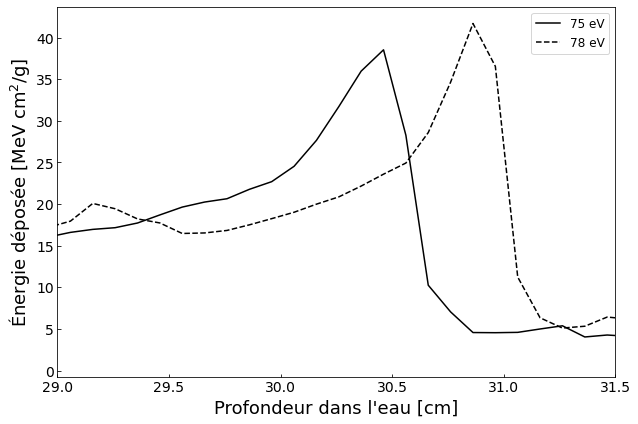

In [13]:

""" Le code ci-bas génère la figure 6.13 du manuel de référence, soit le dépôt de la dose à différentes profondeurs dans un fantôme d'eau avec des valeurs de I_w différentes (67, 75 et 80eV)."""

# ------------------------------- Paramètres ------------------------------------------- #
""" Initialisation des paramètres utilisés dans les codes de simulation TOPAS. """

field_size = 100 # cm2
i_values = np.array([75, 78])      # eV
energies_c = np.array([430, 430, 430])      # MeV/u, u = 12
nbr_c = np.array([10000, 10000, 10000]) # nbr d'ions de carbone simulés pour chaque énergie
tot_depths = np.array([50, 50]) # profondeur des scorers pour chaque particule, en cm
in_fluence_c = nbr_c/field_size # cm-2

np.seterr(divide='ignore', invalid='ignore')

""" initialisation des données """
std_rel_c = np.empty(np.size(energies_c))

""" initialisation de la figure """

fig1 = plt.figure(figsize=(10, 15))
ax1 = plt.subplot(2, 1, 2)      # carbone
plt.xlabel("Profondeur dans l'eau [cm]", fontsize='18')
plt.ylabel("Énergie déposée [MeV cm$^2$/g]", fontsize='18')
plt.tick_params(direction='in',labelsize='14')

marker = ['-','--']


for i in range(len(i_values)):
    i_value = i_values[i]
    path = r"/Users/pdionne/Université/Maîtrise/A23/Phys des radiations/Devoir/Proton - A23/6_13_carbon_430MeV_Iw_{}eV_vf.csv".format(i_value)
    bins, dose, std = csv_to_data(path)

    # erreur relative
    std_rel_c[i] = (np.nanmean(std/dose))*100 # % erreur moyenne sur mesure de dose
    if std_rel_c[i] < 3: # erreur maximale est choisie à 3%
        print("Ion de carbone de ", i_value, "eV - Erreur relative suffisante atteinte!")
        print(format(std_rel_c[i], '.3g'), "% <", "3 %")
    else:
        print("Ion de carbone ", i_value, "eV - Erreur relative trop élevée")
        print(format(std_rel_c[i], '.3g'), "% >", "3 %")

    # conversion dose et profondeur
    depth = bins * tot_depths[1]/len(bins)
    dose = dose/(10000*MeV_to_joule*in_fluence_c[i]) # MeV cm2/g, conversion des MeV en Joule et normalisation par la fluence initiale

# Figure
    ax1.plot(depth, dose, marker[i], label="{} eV".format(i_value), color="k")

    ax1.set_xlim([29, 31.5])
    ax1.legend(loc=0, frameon=True, fontsize='12')


En utilisant l'eau prédéfinie par Geant4 (Water_75eV et G4_WATER) qui ont une _mean excitation energy_ de 75eV et 78eV, il est possible de voir l'augmentation de la profondeur à laquelle le pic de Bragg apparaît dans le milieu. Le premier pic de Bragg pour le _I_ de 75eV est à 30.5cm du début du fantôme alors que pour celui de 78eV, le pic se retrouve à 30.8cm de la surface. 

Selon le Attix, pour chaque changement de 2 eV dans la valeur de _I_, ont s'attend à un déplacement de 1 mm du pic de Bragg. Ici, pour une variation de 3 eV, nous avons une variation de 3 mm, ce qui est le double de ce qui est attendu. Cette variation peut être explicable par les listes de "physiques" utilisées qui ne sont pas toutes à faites appropriées pour les simulations effectuées.

 Pour revenir à l'argument avançant qu'il est possible d'atteindre une précision sub-millimétrique pour les faisceau de protons et de carbones, ce dernier n'est pas valable comme il a été démontré ici et par Andreo (_On the clinical spatial resolution achievable with protons and heavier charged particle radiotherapy beams_, 2009, _Phys. Med. Biol_. 54). En effet, comme le corps humain est composé d'une variété de tissus différents ayant différentes valeurs de _mean excitation energy_, il serait nécessaire d'augmenter le volume de traitement clinique afin de tenir compte de la variation de profondeur à laquelle le pic de Bragg se produit. Il est également important de tenir compte que la position du pic de Bragg est également dépendant de l'énergie du faisceau de traitement, comme démontré à la figure précédente et dans le livre d'Attix à la figure 6.12.

